In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Reading the dataset
data=pd.read_csv(r"C:\Users\ADMIN\Downloads\car_age_price (1).csv")

In [5]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


# Exploring the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
Year     112 non-null int64
Price    112 non-null int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [8]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


# checking for missing values

In [9]:
data.isna().sum()

Year     0
Price    0
dtype: int64

# Plotting the Heatmap

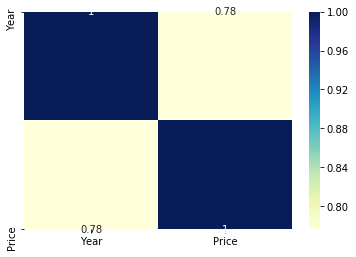

In [34]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot = True,cmap='YlGnBu')
plt.show()

In [11]:
data.columns

Index(['Year', 'Price'], dtype='object')

# Seperating the features and target variable(price)

In [12]:
x = data[['Year']]
y = data['Price']

In [13]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [14]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

# Splitting the data into training and testing sets

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Training the linear regression model

In [17]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
model = linear_model.fit(x_train, y_train)

# Making predictions on the testing set using the linear regression model

In [18]:
predictions = model.predict(x_test)

# Calculating the MSE and R squared value for linear regression

In [19]:
from sklearn.metrics import mean_squared_error,r2_score
linear_mse = mean_squared_error(y_test, predictions)
linear_mse

4326906256.829671

In [20]:
print('R squared value = ',r2_score(y_test,predictions))

R squared value =  0.36759313425902185


# Training the Lasso regression model

In [25]:
from sklearn.linear_model import Lasso

In [26]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

# Making predictions on the testing set using the Lasso regression model

In [27]:
lasso_predictions = lasso_model.predict(x_test)

# Calculate the MSE and R squared value for Lasso regression

In [28]:
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_mse

4326901608.19506

In [29]:
print('R squared value = ',r2_score(y_test,lasso_predictions))

R squared value =  0.36759381368868127


In [ ]:
# The mean squared error (MSE) for linear regression is, 
#MSE =  4326906256.829671
#The mean squared error (MSE) for lasso regression is,
#MSE =  4326901608.19506

# Predicting the price of a 2022 model second-hand Grand i10 using the better-performing model

In [33]:
Model = linear_model if linear_mse < lasso_mse else lasso_model
year_2022 = [[2022]]
predicted_price = model.predict(year_2022)
print('Predicted Price of a 2022 Model Second-hand Grand i10:', predicted_price)

Predicted Price of a 2022 Model Second-hand Grand i10: [743601.61594504]
